In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt 
from numpy import cos
from numpy import sin
import scipy.integrate as integrate
import time
from skopt import gp_minimize
import pandas as pd


/anaconda/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
import glob


files = glob.glob("ux1zero_*.csv")
dfs = [pd.read_csv(f, header=None) for f in files]

data = pd.concat(dfs,ignore_index=True)

In [3]:
in_1=pd.read_csv("ux1_0_input_1.csv",header=None)
out_1=pd.read_csv("ux1_0_result_1.csv",header=None,names=["0"]).abs()
in_2=pd.read_csv("ux1_0_input_2.csv",header=None,)
out_2=pd.read_csv("ux1_0_result_2.csv",header=None,names=["0"]).abs()
in_3=pd.read_csv("ux1_0_input_3.csv",header=None)
out_3=pd.read_csv("ux1_0_result_3.csv",header=None,names=["0"]).abs()

In [4]:
out_1.loc[out_1['0'] < 0.01, '0'] = 0
out_1.loc[out_1['0'] > 0.01, '0'] = 1
out_2.loc[out_2['0'] < 0.01, '0'] = 0
out_2.loc[out_2['0'] > 0.01, '0'] = 1
out_3.loc[out_3['0'] < 0.01, '0'] = 0
out_3.loc[out_3['0'] > 0.01, '0'] = 1

0    19948.0
dtype: float64

In [5]:
import tensorflow as tf

from tensorflow import keras

/anaconda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [61]:
x_train1 =np.vstack((in_1,in_2,in_3))
y_train1 =np.vstack((out_1,out_2,out_3)).astype(int)
x_train2 =data.values
y_train2 =np.zeros((99,1))


In [62]:
x_train = np.vstack((x_train1,x_train2))
y_train = np.vstack((y_train1,y_train2))


In [66]:
boolen=np.ndarray.flatten(y_train==0)
learn=x_train[boolen]


In [ ]:
## deep learning

In [91]:
x_t=np.vstack ((learn,np.random.uniform(low=-1, high=1, size=(len(learn),7)) ))
y_t=np.vstack ((  np.zeros((len(learn),1)) ,np.ones((len(learn),1)) ))


In [93]:

# Generate dummy data


model = Sequential()
model.add(Dense(32, input_dim=7, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

model.fit(x_t, y_t,
          epochs=20,
          batch_size=128)
score = model.evaluate(x_t, y_t, batch_size=128)

Epoch 1/20
438/438 [==============================] - 0s 994us/sample - loss: 0.7226 - accuracy: 0.5114
Epoch 2/20
438/438 [==============================] - 0s 23us/sample - loss: 0.7013 - accuracy: 0.5525
Epoch 3/20
438/438 [==============================] - 0s 16us/sample - loss: 0.7208 - accuracy: 0.4863
Epoch 4/20
438/438 [==============================] - 0s 18us/sample - loss: 0.7018 - accuracy: 0.5183
Epoch 5/20
438/438 [==============================] - 0s 17us/sample - loss: 0.6988 - accuracy: 0.5479
Epoch 6/20
438/438 [==============================] - 0s 20us/sample - loss: 0.7013 - accuracy: 0.5068
Epoch 7/20
438/438 [==============================] - 0s 20us/sample - loss: 0.6914 - accuracy: 0.5342
Epoch 8/20
438/438 [==============================] - 0s 16us/sample - loss: 0.7032 - accuracy: 0.4932
Epoch 9/20
438/438 [==============================] - 0s 17us/sample - loss: 0.7101 - accuracy: 0.5137
Epoch 10/20
438/438 [==============================] - 0s 18us/sample - 

In [36]:
dx1zero=pd.DataFrame(data=learn,
          index=np.array(range(1, 220)),
          columns=np.array(range(1, 8)))

In [37]:
dx1zero.head()

,1,2,3,4,5,6,7
1,-0.495985,-0.059770,0.671071,-0.579993,0.384655,0.388962,-0.365376
2,-0.927736,0.577338,0.963036,0.194505,-0.656885,0.581193,0.194853
3,-0.900698,-0.828403,0.966695,-0.554801,0.795885,-0.784672,0.952982
4,0.532479,-0.849883,0.028072,-0.346330,0.549963,-0.329064,-0.621644
5,0.736420,-0.626396,0.106850,0.788154,-0.146601,-0.084168,-0.054172


In [56]:
try1=dx1zero**2

In [40]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)

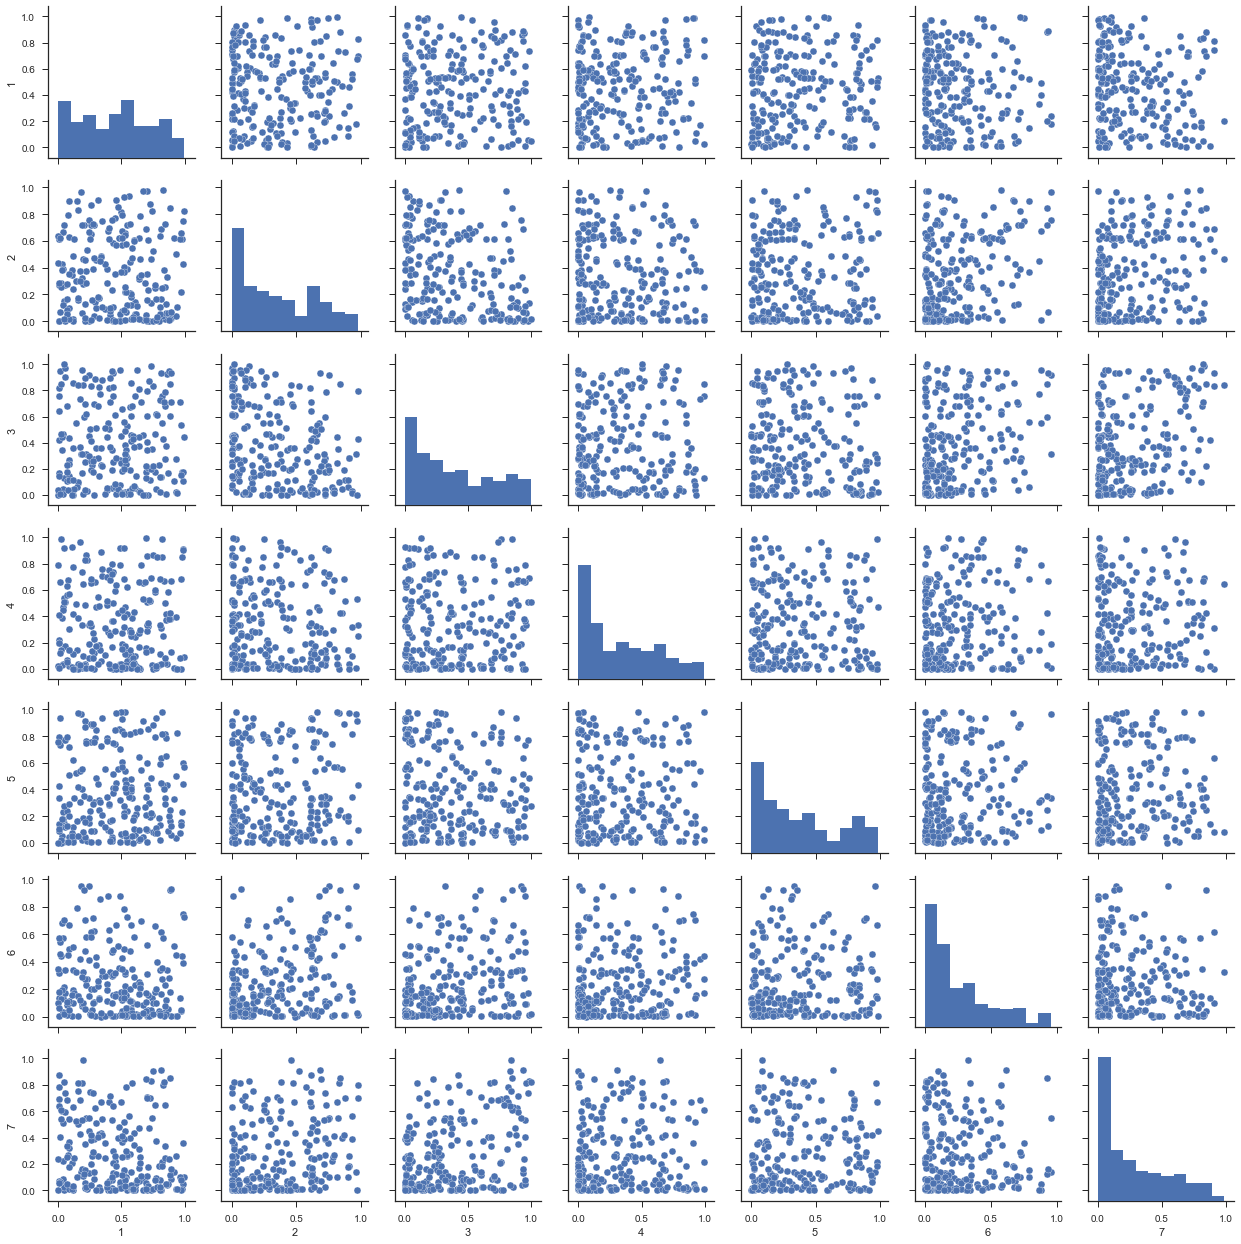

In [57]:
g = sns.pairplot(try1)

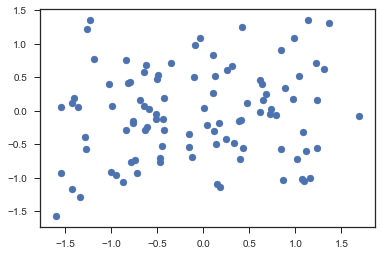

In [39]:
plt.scatter(data[1]+data[2],data[5]+data[6])